In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'

SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [470]:
with h5py.File(SZALAY_PATH, 'a') as f:
    f.create_dataset('wave', data = wave, shape = (15404,))  

In [ ]:
with h5py.File(SZALAY_PATH, 'r') as f:
    wave = f['wave'][()]

In [6]:
with h5py.File(NORM_PATH, 'r') as f:
    flux = f['flux'][()]
    mask = f['flux_idx'][()]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
#     wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]    

In [7]:
np.digitize(10000, T_eff)

27

In [8]:
grid_lowT = flux[:, : np.digitize(10000, T_eff) ,...]
mask_lowT = mask[:, : np.digitize(10000, T_eff) ,...]
flux_lowT = grid_lowT[mask_lowT]

In [11]:
grid_lowT.shape, flux_lowT.shape

((14, 27, 11, 6, 4, 15404), (69232, 15404))

In [17]:
from sklearn.decomposition import TruncatedSVD
from matplotlib.colors import LogNorm

In [13]:
cov = flux_lowT.T.dot(flux_lowT)

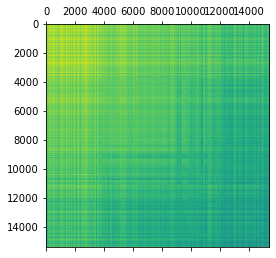

In [19]:
plt.matshow(abs(cov), norm = LogNorm())

In [15]:
svd = TruncatedSVD(n_components=40, n_iter=7, random_state=42)
svd.fit(cov)

TruncatedSVD(n_components=40, n_iter=7, random_state=42)

In [ ]:
plt.plot()

In [9]:
flux_lowT.shape

(69232, 15404)

In [ ]:
mask_lowT